This notebook aims to predict customer churn in the banking industry. In recent decades, the options for customers to store their money has been rapidly increasing. Customer churn has been one of the top issues for many banks. The motivation for this research is to leverage machine learning methods to predict churn, assisting banks in preemptive engagement with at-risk customers.

The dataset used can be downloaded from here: https://www.kaggle.com/competitions/playground-series-s4e1/data

In [184]:
import warnings

# Filter out warnings
warnings.filterwarnings("ignore")

## **1. Exploratory Data Analysis**

In [185]:
import pandas as pd
import numpy as np
import sklearn

### **1.1 Understand the Dataset**

#### **1.1.1 Review dataset dimensions**

In [186]:
# Load the dataset
df = pd.read_csv('bank churn.csv')

# Examine the dimension of the dataset
df.shape

(165034, 14)

The dataset contains more than 160,000 rows, which is quite enough to build a machine learning model. It has 14 columns, 10 of which (`CreditScore`, `Geography`, `Gender`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `HasCrCard`, `IsActiveMember`, `EstimatedSalary`) are useful features and one of them is the target variable `Exited` indicating whether the customer has exited the bank or not.

From the following lines, we can observe that `HasCrCard`, `IsActiveMember`, `Exited` are already encoded as 0 or 1.

In [187]:
# Examine top 10 rows of the dataset
df.head(10)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1,0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1,1,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1,0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1,1,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1,1,15068.83,0
5,5,15771669,Genovese,588,Germany,Male,36.0,4,131778.58,1,1,0,136024.31,1
6,6,15692819,Ch'ang,593,France,Female,30.0,8,144772.69,1,1,0,29792.11,0
7,7,15669611,Chukwuebuka,678,Spain,Male,37.0,1,138476.41,1,1,0,106851.60,0
8,8,15691707,Manna,676,France,Male,43.0,4,0.00,2,1,0,142917.13,0
9,9,15591721,Cattaneo,583,Germany,Male,40.0,4,81274.33,1,1,1,170843.07,0


In [188]:
# Explore taget variable
print(df.Exited.value_counts())
print(round(sum(df['Exited'])/len(df), 4))

Exited
0    130113
1     34921
Name: count, dtype: int64
0.2116


Around 21.16% of customers have exited the bank. There is an imbalance problem in this dataset. This will be solved through up/down-sampling on training data only (not on testing data) in later stages.

#### **1.1.2 Identify feature types (numerical, categorical)**

In [189]:
# check the data types: columns with mixed types are stored with the object dtype.
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

The feature types are generally what we would normally expect. Numerical features include: `CreditScore`, `Age`, `Tenure`, `Balance`, `NumOfProducts`, `EstimatedSalary`. Categorical features include: `Geography`, `Gender`, `HasCrCard`, `IsActiveMember`. In these categorical features, `Geography` and `Gender` should be changed to "category" format.

## **1.2 Data Cleaning**

#### **1.2.1 Check and handling missing values (numerical, categorical)**

In [190]:
# Check missing values
null_sum = df.isnull().sum()
null_sum

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There is no missing values in this dataset, as observed from the above result and described from the original source: https://www.kaggle.com/competitions/playground-series-s4e1/data.

This dataset is generated from a deep learning model trained on the original "Bank Customer Churn Prediction" dataset from Kaggle.

#### **1.2.2 Detect and Handle Outliers (categorical)**

In [191]:
# count the #samples fall into each category
print(df['Geography'].value_counts())
print()
print("Percentage of customers in France: {}".format(round(sum(df['Geography']=='France')/len(df), 4)))
print("Percentage of customers in Spain: {}".format(round(sum(df['Geography']=='Spain')/len(df), 4)))
print("Percentage of customers in Germany: {}".format(round(sum(df['Geography']=='Germany')/len(df), 4)))

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Percentage of customers in France: 0.5709
Percentage of customers in Spain: 0.2194
Percentage of customers in Germany: 0.2097


A larger amount of customers are located in France, while the number of customers located in Spain and Germany are very close.

In [192]:
# count the #samples fall into each category
print(df['Gender'].value_counts())
print()
print("Percentage of male customers: {}".format(round(sum(df['Gender']=='Male')/len(df), 4)))
print("Percentage of female customers: {}".format(round(sum(df['Gender']=='Female')/len(df), 4)))

Gender
Male      93150
Female    71884
Name: count, dtype: int64

Percentage of male customers: 0.5644
Percentage of female customers: 0.4356


There are more male observations than female observations.

In [193]:
# count the #samples fall into each category
print(df['HasCrCard'].value_counts())
print()
print("Percentage of customers who own a credit card: {}".format(round(sum(df['HasCrCard']==1)/len(df), 4)))
print("Percentage of customers who do not own a credit card: {}".format(round(sum(df['HasCrCard']==0)/len(df), 4)))

HasCrCard
1    124428
0     40606
Name: count, dtype: int64

Percentage of customers who own a credit card: 0.754
Percentage of customers who do not own a credit card: 0.246


Around 75% of the customers do have a credit card.

In [194]:
# count the #samples fall into each category
print(df['IsActiveMember'].value_counts())
print()
print("Percentage of customers who are active members: {}".format(round(sum(df['IsActiveMember']==1)/len(df), 4)))
print("Percentage of customers who are not active members: {}".format(round(sum(df['IsActiveMember']==0)/len(df), 4)))

IsActiveMember
0    82885
1    82149
Name: count, dtype: int64

Percentage of customers who are active members: 0.4978
Percentage of customers who are not active members: 0.5022


The distribution for whether the customer is an active member is quite even.

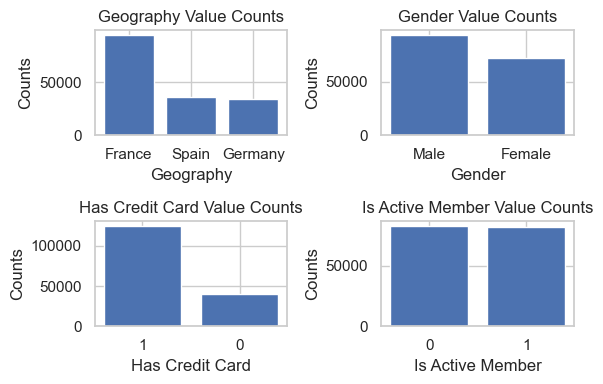

In [195]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of axes
fig, axs = plt.subplots(2, 2, figsize=(6, 4))  # You can adjust the figsize to fit your display

# Plot on each subplot
axs[0, 0].bar(df['Geography'].value_counts().index, df['Geography'].value_counts().values)
axs[0, 0].set_title('Geography Value Counts')
axs[0, 0].set_xlabel('Geography')
axs[0, 0].set_ylabel('Counts')

axs[0, 1].bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
axs[0, 1].set_title('Gender Value Counts')
axs[0, 1].set_xlabel('Gender')
axs[0, 1].set_ylabel('Counts')

axs[1, 0].bar(df['HasCrCard'].value_counts().index.astype(str), df['HasCrCard'].value_counts().values)
axs[1, 0].set_title('Has Credit Card Value Counts')
axs[1, 0].set_xlabel('Has Credit Card')
axs[1, 0].set_ylabel('Counts')

axs[1, 1].bar(df['IsActiveMember'].value_counts().index.astype(str), df['IsActiveMember'].value_counts().values)
axs[1, 1].set_title('Is Active Member Value Counts')
axs[1, 1].set_xlabel('Is Active Member')
axs[1, 1].set_ylabel('Counts')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


Through visualizing the distribution of the categorical variables in the data frame, it is obvious to see there is no outliers in those features.

#### **1.2.3 Detect and Handle Outliers (numerical)**

In [196]:
# count the #samples fall into each category
df['CreditScore'].value_counts()

CreditScore
850    2532
678    2299
684    1718
667    1658
705    1605
       ... 
419       1
386       1
358       1
423       1
373       1
Name: count, Length: 457, dtype: int64

In [197]:
# count the #samples fall into each category
df['Age'].value_counts()

Age
37.00    9255
38.00    9246
35.00    9118
34.00    8625
36.00    8556
         ... 
84.00       4
83.00       3
85.00       3
36.44       1
32.34       1
Name: count, Length: 71, dtype: int64

In [198]:
# count the #samples fall into each category
df['Tenure'].value_counts()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

In [199]:
# count the #samples fall into each category
df['Balance'].value_counts()

Balance
0.00         89648
124577.33       88
127864.40       64
122314.50       63
129855.32       59
             ...  
125824.21        1
158741.56        1
126815.52        1
61172.57         1
110993.29        1
Name: count, Length: 30075, dtype: int64

In [200]:
# count the #samples fall into each category
df['NumOfProducts'].value_counts()

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [201]:
# count the #samples fall into each category
df['EstimatedSalary'].value_counts()

EstimatedSalary
88890.05     178
140941.47    107
167984.72    100
90876.95      98
129964.94     98
            ... 
102747.73      1
170593.45      1
109179.48      1
60538.47       1
71173.03       1
Name: count, Length: 55298, dtype: int64

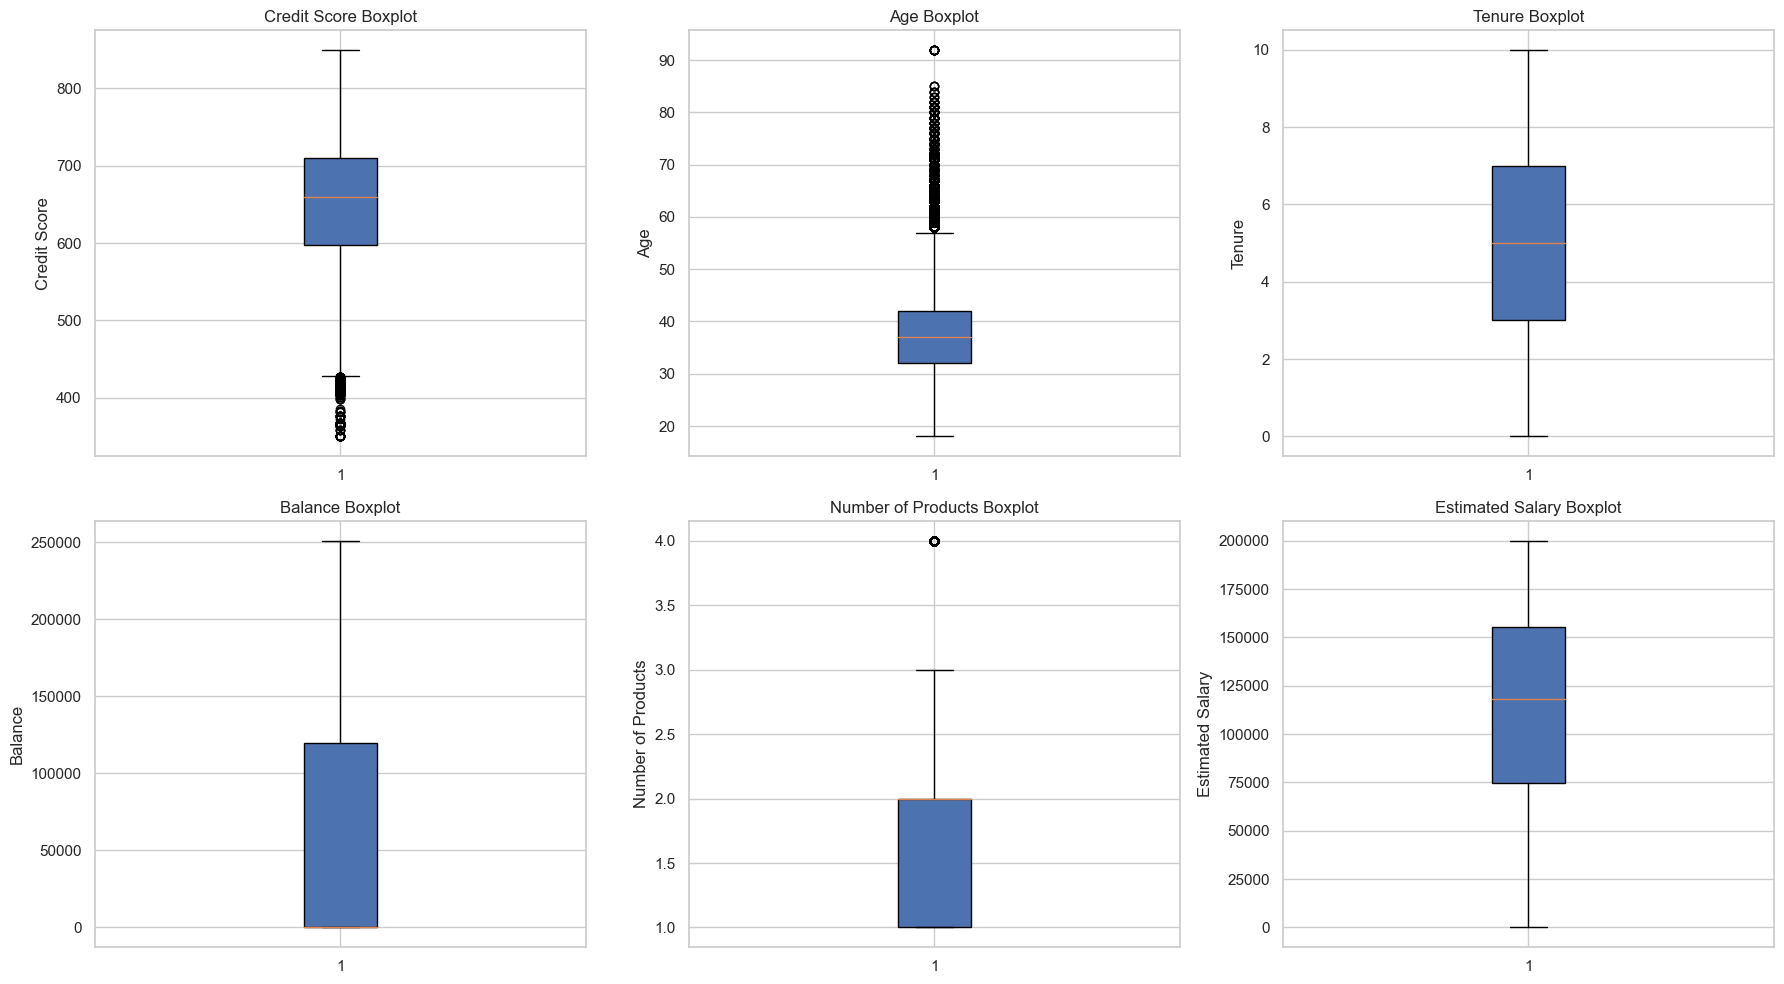

In [202]:
# Assuming df is your DataFrame and already defined.

# Create a 2x3 grid of axes
fig, axs = plt.subplots(2, 3, figsize=(18, 10))  # Adjust the figsize to better fit the display

# Plot boxplot for CreditScore
axs[0, 0].boxplot(df['CreditScore'].dropna(), patch_artist=True)  # dropna() removes missing values
axs[0, 0].set_title('Credit Score Boxplot')
axs[0, 0].set_ylabel('Credit Score')

# Plot boxplot for Age
axs[0, 1].boxplot(df['Age'].dropna(), patch_artist=True)
axs[0, 1].set_title('Age Boxplot')
axs[0, 1].set_ylabel('Age')

# Plot boxplot for Tenure
axs[0, 2].boxplot(df['Tenure'].dropna(), patch_artist=True)
axs[0, 2].set_title('Tenure Boxplot')
axs[0, 2].set_ylabel('Tenure')

# Plot boxplot for Balance
axs[1, 0].boxplot(df['Balance'].dropna(), patch_artist=True)
axs[1, 0].set_title('Balance Boxplot')
axs[1, 0].set_ylabel('Balance')

# Plot boxplot for NumOfProducts
axs[1, 1].boxplot(df['NumOfProducts'].dropna(), patch_artist=True)
axs[1, 1].set_title('Number of Products Boxplot')
axs[1, 1].set_ylabel('Number of Products')

# Plot boxplot for EstimatedSalary
axs[1, 2].boxplot(df['EstimatedSalary'].dropna(), patch_artist=True)
axs[1, 2].set_title('Estimated Salary Boxplot')
axs[1, 2].set_ylabel('Estimated Salary')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


From the boxplots above, we can see there are some observations lying out of the IQR range for features `CreditScore`, `Age` and `NumOfProducts`. Since the values in these potential outliers are within reasonable range, it is decided to keep them in the dataset rather than removing. For example, in the boxplot of `CreditScore`, the values of potential outliers are nearly within a range of [320, 420]. A credit score within 300-579 is considered a poor score. Therefore, these values are reasonable and could be important features to predict the probability of the customer exiting the bank or not.

In terms of the `Age` boxplot, the values of potential outliers are roughly within [57, 90]. These may correspond to older individuals, and it is not uncommon to have a wider age range in a general population.

In terms of the `NumOfProducts` boxplot, the value of "4" lies out of the IQR range because very few customers hold 4 kinds of products in the bank. However, this should not be treated as outliers because it is also not due to any data entry error.

#### **1.2.4 Check Duplicates**

In [203]:
# Check if there is any duplicated rows
duplicates = df.duplicated()
has_duplicates = duplicates.any()

print("Are there any duplicates?", has_duplicates)

Are there any duplicates? False


### **1.3 Data Transformation and Feature Engineering**

#### **1.3.1 Group features by types**

In [204]:
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df_num = df[num_col]
cat_col = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
df_cat = df[cat_col]

#### **1.3.2 Numerical data: normalization/standardization**

In [205]:
# Convert all numerical columns into float format
df_num = df_num.astype('float')

In [206]:
# Check data types of numerical columns
df_num.dtypes

CreditScore        float64
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
EstimatedSalary    float64
dtype: object

In [207]:
# Normalize numerical data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df_num = scaler.fit_transform(df_num.values)
df_num = pd.DataFrame(df_num, columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'])
df_num                

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,0.636,0.202703,0.3,0.000000,0.333333,0.907279
1,0.554,0.202703,0.1,0.000000,0.333333,0.247483
2,0.656,0.297297,1.0,0.000000,0.333333,0.924364
3,0.462,0.216216,0.2,0.593398,0.000000,0.422787
4,0.732,0.202703,0.5,0.000000,0.333333,0.075293
...,...,...,...,...,...,...
165029,0.634,0.202703,0.2,0.000000,0.000000,0.659179
165030,0.884,0.229730,0.3,0.000000,0.000000,0.659177
165031,0.430,0.175676,0.5,0.000000,0.000000,0.637151
165032,0.408,0.162162,0.7,0.643819,0.000000,0.355841


#### **1.3.3 Categorical data: one-hot encoding, ordinal encoding**

In [208]:
# Convert ['Geography', 'Gender'] to category format, "HasCrCard", "IsActiveMember" are already encoded
df_cat[['Geography', 'Gender']] = df_cat[['Geography', 'Gender']].astype('category')

In [209]:
df_cat.dtypes

Geography         category
Gender            category
HasCrCard            int64
IsActiveMember       int64
dtype: object

In [210]:
from sklearn.preprocessing import OneHotEncoder

# Transform "Geography" and "Gender" to ohe format
ohe = OneHotEncoder(handle_unknown = 'ignore', dtype=np.int64)

# Fit the variables
ohe.fit(df_cat[['Geography', 'Gender']])

OneHotEncoder(dtype=<class 'numpy.int64'>, handle_unknown='ignore')

In [211]:
# View categories
ohe.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [212]:
# we will relabel these as FeatureName_value to make it self-explainable
new_col_names = []
text_cols = ['Geography', 'Gender']

index = 0

for arr, col_name in zip(ohe.categories_, text_cols):
    for ele in arr[:]: # Skipping the first value label because our OHE model is set to drop the first feature value
        new_col_name = col_name + '_' + ele.strip(' ') 
        new_col_names.append(new_col_name)

# Create dataset of binary features
df_ohe = pd.DataFrame(ohe.transform(df[text_cols]).toarray(), columns=new_col_names)
print(df_ohe.shape)

(165034, 5)


In [213]:
# View "df_ohe"
df_ohe

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,0,1,0,1
...,...,...,...,...,...
165029,0,0,1,1,0
165030,1,0,0,0,1
165031,1,0,0,0,1
165032,0,0,1,1,0


#### **1.3.4 Concatenate numerical features and encoded categorical features and create training and testing data** 

In [214]:
# Finalize feature matrix and target variable, and create train-test split
df_X = pd.concat([df_num, df_ohe, df[['HasCrCard', 'IsActiveMember']]], axis=1)

# Print df_X to view
df_X

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember
0,0.636,0.202703,0.3,0.000000,0.333333,0.907279,1,0,0,0,1,1,0
1,0.554,0.202703,0.1,0.000000,0.333333,0.247483,1,0,0,0,1,1,1
2,0.656,0.297297,1.0,0.000000,0.333333,0.924364,1,0,0,0,1,1,0
3,0.462,0.216216,0.2,0.593398,0.000000,0.422787,1,0,0,0,1,1,1
4,0.732,0.202703,0.5,0.000000,0.333333,0.075293,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.634,0.202703,0.2,0.000000,0.000000,0.659179,0,0,1,1,0,1,1
165030,0.884,0.229730,0.3,0.000000,0.000000,0.659177,1,0,0,0,1,0,0
165031,0.430,0.175676,0.5,0.000000,0.000000,0.637151,1,0,0,0,1,1,1
165032,0.408,0.162162,0.7,0.643819,0.000000,0.355841,0,0,1,1,0,0,1


In [215]:
# Create target variable
target = 'Exited'
df_y = df[[target]]
df_y.shape

(165034, 1)

In [216]:
from sklearn.model_selection import train_test_split

# Split data into train/test set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.3, 
                                                                random_state = 42)

# Examine train and test set shape
X_train.shape, X_test.shape

((115523, 13), (49511, 13))

### **1.4 Statistical Summary**

#### **1.4.1 Basic statistics (mean, median, mode)**

In [217]:
# Check summary statistics on the numerical columns of the original data frame
# before normalization
round(df[num_col].describe(), 2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,165034.00,165034.00,165034.00,165034.00,165034.00,165034.00
mean,656.45,38.13,5.02,55478.09,1.55,112574.82
std,80.10,8.87,2.81,62817.66,0.55,50292.87
min,350.00,18.00,0.00,0.00,1.00,11.58
25%,597.00,32.00,3.00,0.00,1.00,74637.57
50%,659.00,37.00,5.00,0.00,2.00,117948.00
75%,710.00,42.00,7.00,119939.52,2.00,155152.47
max,850.00,92.00,10.00,250898.09,4.00,199992.48


All the values in the summary statistics seems reasonable. One interesting point from the table is that most of the account has a balance of zero.

#### **1.4.2 Visualization (scatter plot, histograms, boxplot, heatmap, etc)**

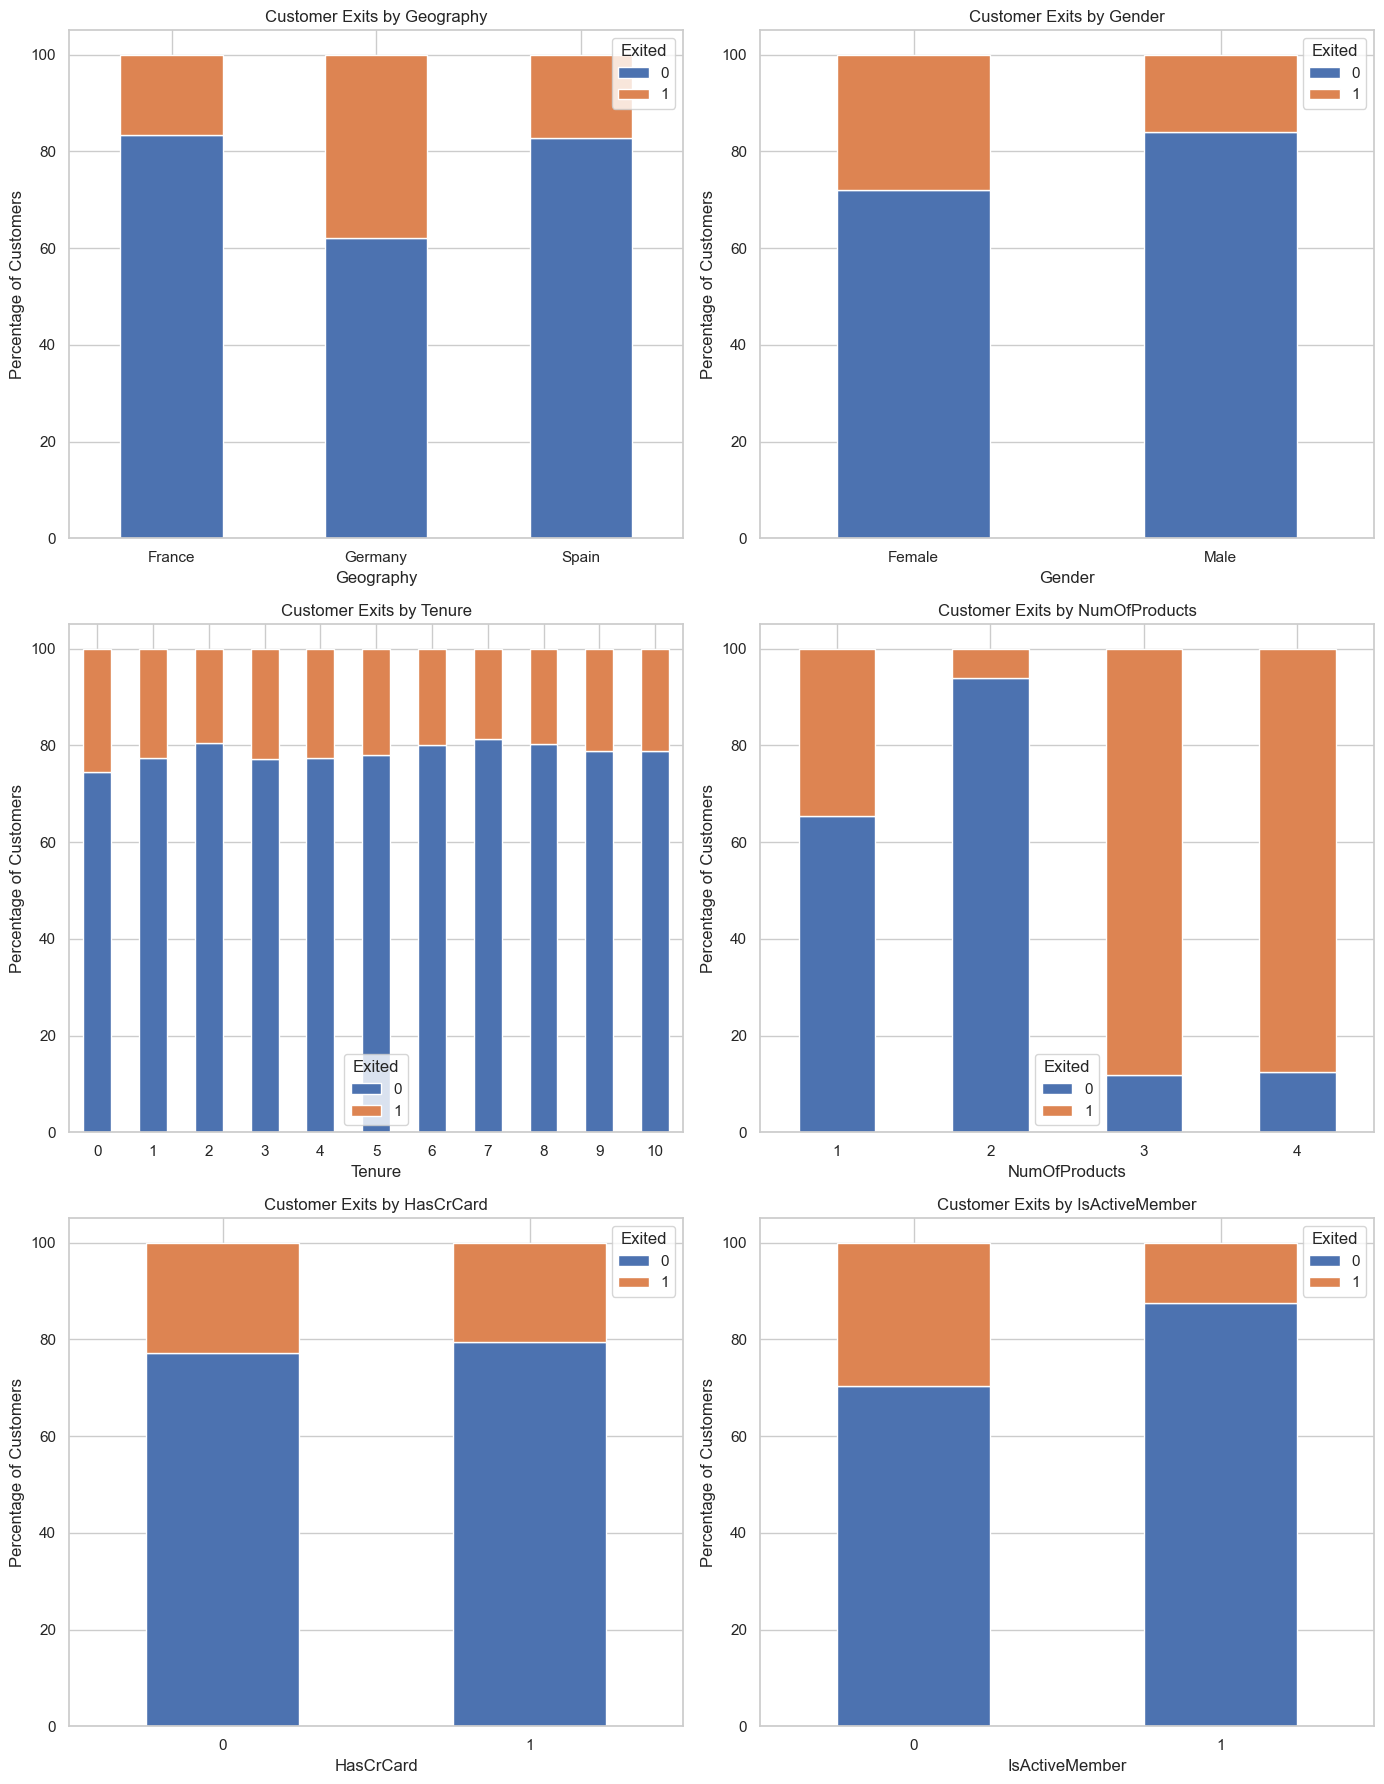

In [218]:
# Assuming 'df' is your DataFrame and contains the 'Exited' column as integer

# Set figure size
plt.figure(figsize=(14, 18))

# Define the categories for plotting
categories = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Loop through each category to plot
for i, category in enumerate(categories):
    plt.subplot(3, 2, i+1)  # Creating a subplot for each category
    
    # Calculating the proportion of each category by 'Exited' status
    data = df.groupby([category])['Exited'].value_counts(normalize=True).unstack().fillna(0) * 100
    
    # Plotting stacked bars
    data.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Customer Exits by {category}')
    plt.xlabel(category)
    plt.ylabel('Percentage of Customers')
    plt.xticks(rotation=0)

plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


From the above stack plots, several observations are noted:

1) The exit rate in Germany is notably higher than in France and Spain;
2) The exit rate in female customers is higher than for male customers;
3) Different years of tenures and whether the customer has credit card or not seem unimportant to the exit rate.
4) Counterintuitively, customers who hold 3 or 4 products in the bank are more likely to exit the bank, while customers who hold 2 products in the bank tend to have to lowest exit rate;
5) Customers who are active members are more likely to stay in the bank.

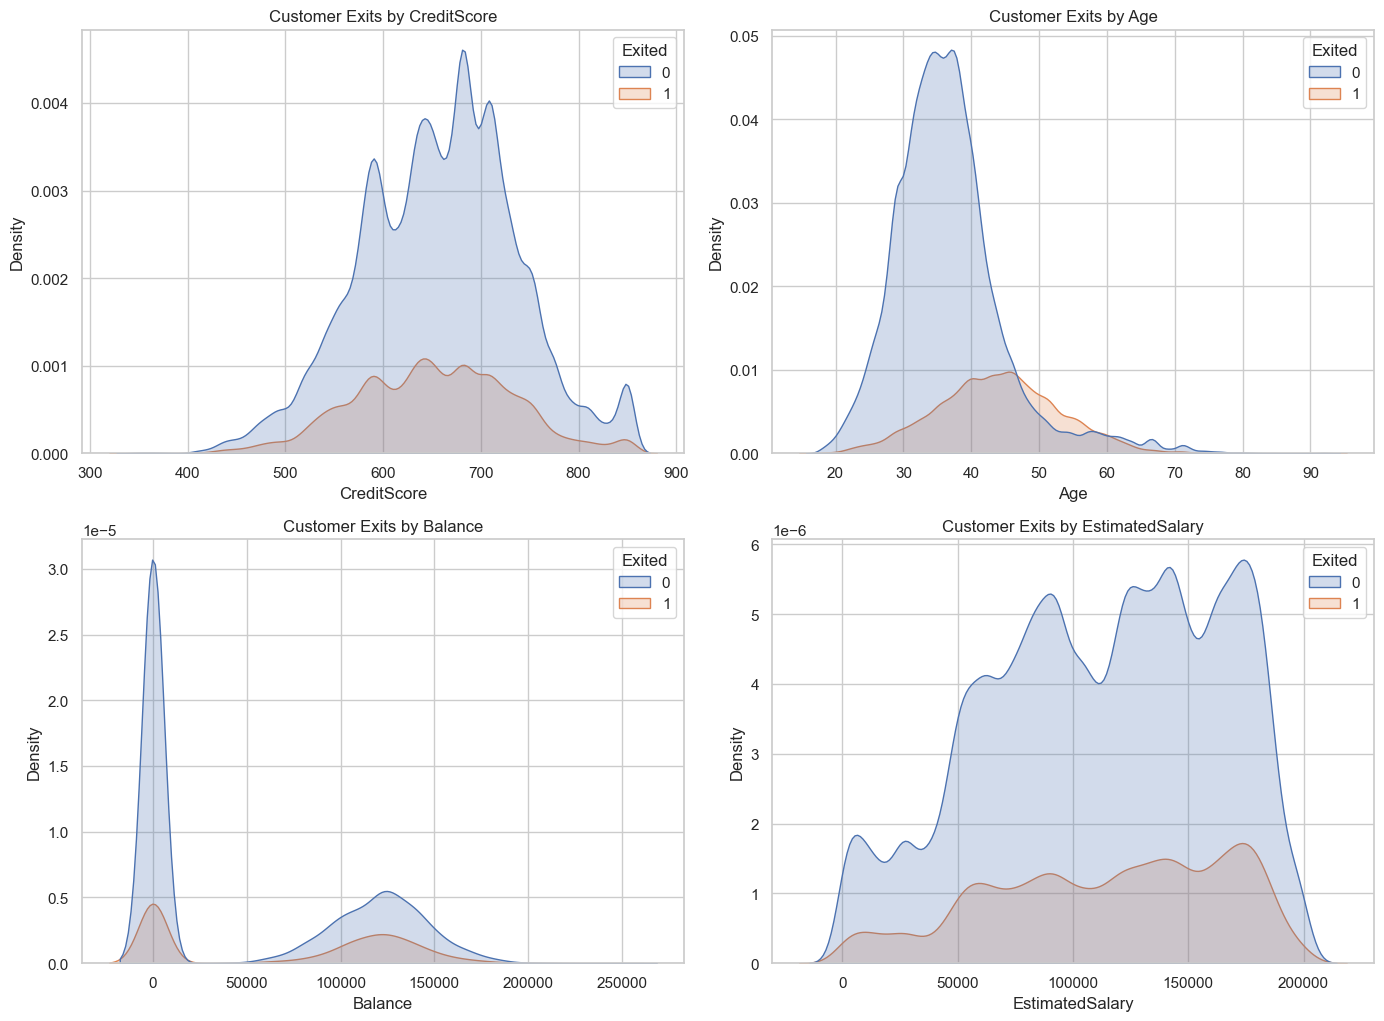

In [219]:
import seaborn as sns

sns.set(style="whitegrid")

variables = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
n_rows = 3  
n_cols = 2  

plt.figure(figsize=(14, 15))

for i, variable in enumerate(variables):
    plt.subplot(n_rows, n_cols, i+1) 
    sns.kdeplot(data=df, x=variable, hue="Exited", fill=True)
    plt.title(f'Customer Exits by {variable}')
    plt.xlabel(f'{variable}')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()

One interesting observation from the above density plots is that customers aged between 47 and 58 are more likely to churn. The number of customers within this age range who churned exceeds the number of customers who did not churn.

#### **1.4.3 Check data distribution and skewness**

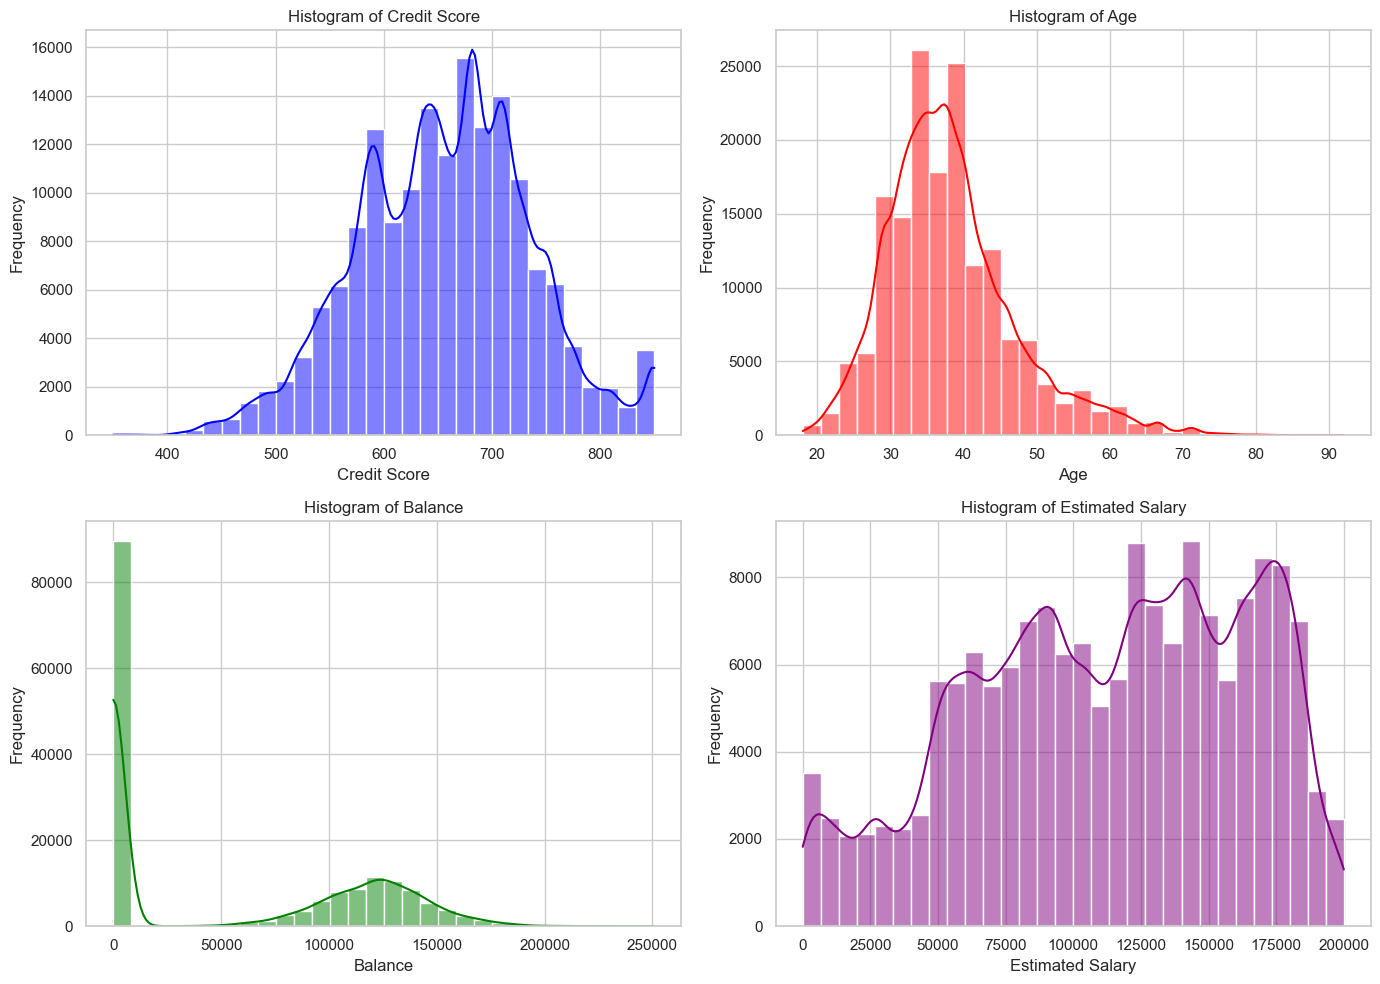

In [220]:
plt.figure(figsize=(14, 10))

# CreditScore
plt.subplot(2, 2, 1)
sns.histplot(df['CreditScore'], bins=30, kde=True, color='blue')
plt.title('Histogram of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

# Age
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True, color='red')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Balance
plt.subplot(2, 2, 3)
sns.histplot(df['Balance'], bins=30, kde=True, color='green')
plt.title('Histogram of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')

# EstimatedSalary
plt.subplot(2, 2, 4)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True, color='purple')
plt.title('Histogram of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


The distribution of credit score is fairly normal. The distribution of age is a bit right-skewed. In terms of balance, as observed before, a high percentage of the observations are 0. The distribution of balance without zeros seem quite normal. Finally, no obvious skewness is found in the distribution of estimated salary.

### **1.5 Correlation Analysis**

In [221]:
df_X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'HasCrCard',
       'IsActiveMember'],
      dtype='object')

                 CreditScore     Age  Tenure  Balance  NumOfProducts  \
CreditScore           1.0000 -0.0089  0.0009   0.0070         0.0114   
Age                  -0.0089  1.0000 -0.0108   0.0643        -0.1022   
Tenure                0.0009 -0.0108  1.0000  -0.0095         0.0073   
Balance               0.0070  0.0643 -0.0095   1.0000        -0.3610   
NumOfProducts         0.0114 -0.1022  0.0073  -0.3610         1.0000   
EstimatedSalary      -0.0018 -0.0054  0.0010   0.0086        -0.0043   

                 EstimatedSalary  
CreditScore              -0.0018  
Age                      -0.0054  
Tenure                    0.0010  
Balance                   0.0086  
NumOfProducts            -0.0043  
EstimatedSalary           1.0000  


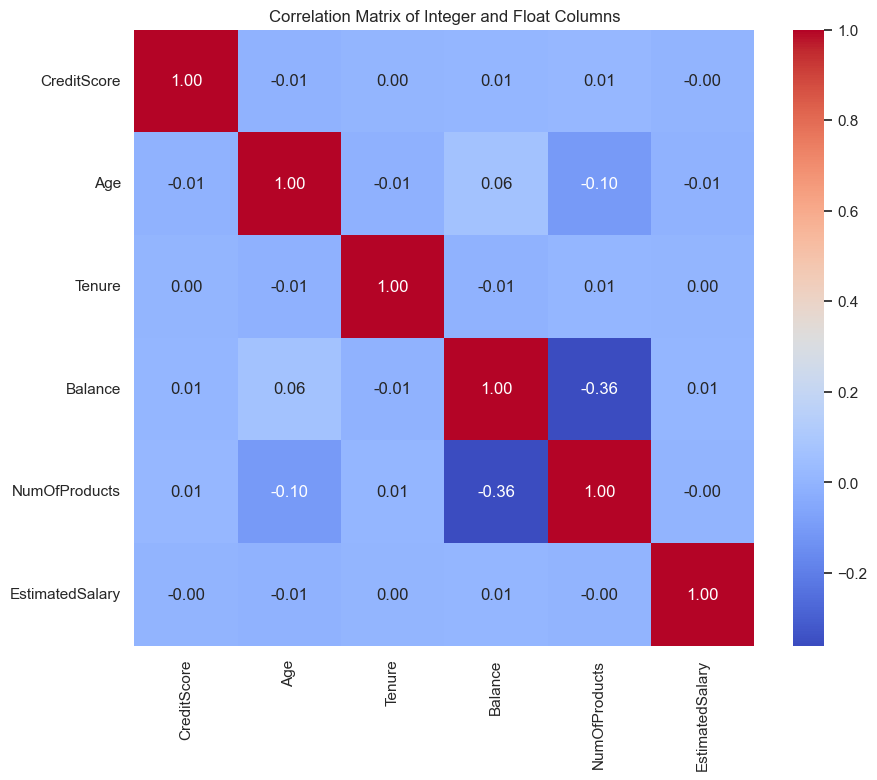

In [222]:
# Select int and float columns
numeric_cols = df_X[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

print(round(corr_matrix,4))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Integer and Float Columns')
plt.show()

Counterintuitively, the number of products and balance in a bank account is negatively correlated and the correlation coefficient is -0.36.

In addition, the number of products and age is also slightly negatively correlated, with a coefficient of around -0.1.

Other than these, the numerical variables are not highly correlated with each other. 

## **2. Supervised Learning**

### 2.1 Handling Data Imbalance Problem: Apply down-sampling method

As seen from EDA, only roughly 20% of observations are labeled as positive for target variable. Therefore, there is an imbalanced problem. We need to handle this problem first before estimating any models. Here, down-sampling method is used because it is easier to implement and easily understood. The balanced dataset is still large enough even after down-sampled.

In [223]:
# Concatenate the features and target of the training data
train_data = pd.concat([X_train, y_train], axis=1)

# Separate the samples that exited and not exited the bank
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Conduct down-sampling
majority_downsampled = majority_class.sample(n=len(minority_class), random_state=42)  # 使数量与少数类相同

# Re-concatenate the training data after applying down-sampling
balanced_train_data = pd.concat([majority_downsampled, minority_class]).reset_index(drop=True)

# Separate the features and target in the down-sampled data
X_train_balanced = balanced_train_data.drop('Exited', axis=1)
y_train_balanced = balanced_train_data[['Exited']]

# View the shape of the balanced training data
print(X_train_balanced.shape, y_train_balanced.shape)

(49086, 13) (49086, 1)


In [224]:
# Examine the balanced training data
balanced_train_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard,IsActiveMember,Exited
0,0.796,0.162162,0.5,0.000000,0.000000,0.548125,1,0,0,0,1,0,1,0
1,0.584,0.121622,0.3,0.000000,0.333333,0.261673,1,0,0,1,0,1,1,0
2,0.626,0.229730,0.7,0.000000,0.333333,0.801959,1,0,0,0,1,1,0,0
3,0.712,0.527027,0.5,0.644892,0.333333,0.870185,0,1,0,1,0,0,1,0
4,0.284,0.337838,0.6,0.000000,0.333333,0.479672,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49081,0.464,0.121622,0.8,0.000000,0.000000,0.060429,1,0,0,1,0,1,0,1
49082,0.492,0.324324,0.8,0.284713,0.000000,0.418395,0,1,0,1,0,1,0,1
49083,0.246,0.297297,0.1,0.429401,0.000000,0.291879,1,0,0,1,0,0,0,1
49084,0.732,0.270270,0.4,0.407682,0.000000,0.973859,0,1,0,1,0,1,0,1


Since this is a binary classification task, suitable models include logistic regression, K-nearest Neighbors (KNN), and random forest. The following estimate these three models one by one and finally combine them in a stacking model.

### 2.2 Logistic Regression

#### Default Logistic Regression:

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Fit a logistic regression model by default parameters as a baseline
lr_default = LogisticRegression(random_state=42).fit(X_train_balanced, y_train_balanced)

# Calculate roc_auc score
auc_scores = cross_val_score(lr_default, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')

# Print score of every fold and average score
print("AUC Scores per fold: ", auc_scores)
print("Average AUC Score: ", round(auc_scores.mean(),6))

AUC Scores per fold:  [0.81543323 0.81641752 0.82326085 0.82335955 0.81552184]
Average AUC Score:  0.818799


In a logistic regression with default parameters, using cross-validation, we have an average AUC score of 0.818799. AUC score is selected because in this context, we care about the model performance using different thresholds.

#### Define a GridSearchCV Function to Improve Code Efficiency:

In [227]:
from sklearn.model_selection import GridSearchCV

def perform_grid_search(model, param_grid, X_train, y_train, scoring_metric, cv_folds):
    
    # Generate a GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring_metric, cv=cv_folds, verbose=2, n_jobs=-1)
    
    # Fit GridSearchCV on training data
    grid_search.fit(X_train, y_train)
    
    # Print best model score
    print(f"Best parameters:, grid_search.best_params_")
    print("Best score: {:.6f}".format(grid_search.best_score_))
    
    return grid_search

#### Implement GridSearchCV in Logistic Regression:

In [228]:
# Define logistic regression model
lr = LogisticRegression(random_state=42)

# Define a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'] # 6*2*2 = 24 combinations --> 24*5 = 120 fits
}

# Perform GridSearchCV to tune parameters
perform_grid_search(lr, param_grid, X_train_balanced, y_train_balanced, 'roc_auc', 5)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.818837


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='roc_auc', verbose=2)

From the result, the best parameters are `{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}`, although the improvement is very small (from 0.818799 to 0.818837).

### 2.3 K-Nearest-Neighbors (KNN)

#### Default KNN:

In [241]:
from sklearn.neighbors import KNeighborsClassifier

# Construct a KNN model
knn_default = KNeighborsClassifier()

# Train and fit the model
knn.fit(X_train_balanced, y_train_balanced)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(knn_default, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc', n_jobs=-1)

print(f"ROC-AUC Scores: {cv_scores}")
print(f"Mean ROC-AUC Score: {cv_scores.mean():.6f}")

ROC-AUC Scores: [0.83418021 0.83435731 0.83557966 0.83541318 0.83299087]
Mean ROC-AUC Score: 0.834504


In this default KNN model, we get a roc_auc score of 0.834504. There is an improvement of around 1.57% from the optimal logistic regression.

In [230]:
import time

# Start a timer
start_time = time.time()

# Construct a KNN model
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

# Perform GridSearchCV to tune parameters
perform_grid_search(knn, param_grid, X_train_balanced, y_train_balanced, 'roc_auc', 5)

# Timer ends
end_time = time.time()

# Calculate and print running time
elapsed_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(elapsed_time))

Fitting 5 folds for each of 84 candidates, totalling 420 fits
Best parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best score: 0.857945
Execution time: 321.22 seconds


The optimal KNN model improves from 0.834504 to 0.857945, around 2.34%.

### 2.4 Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier

rf_default = RandomForestClassifier(random_state = 42).fit(X_train_balanced, y_train_balanced)

# Calculate roc_auc score
rf_auc_scores = cross_val_score(rf_default, X_train_balanced, y_train_balanced, cv=5, scoring='roc_auc')

# Print score of every fold and average score
print("AUC Scores per fold: ", rf_auc_scores)
print("Average AUC Score: ", rf_auc_scores.mean())

AUC Scores per fold:  [0.87235623 0.86993614 0.87840905 0.87263501 0.87127804]
Average AUC Score:  0.8729228943402335


A random forest model even further outperforms the optimal KNN model we saw above! The score goes up from 0.857945 to 0.872923. A drawback of random forest model, however, is that it takes way much longer to estimate, which is computationally inefficient.

In [232]:
import time

# Start a timer
start_time = time.time()

# Define the random forest model
rf = RandomForestClassifier(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']  # 3*4*3*3*2 = 216 combinations --> 1080 fits
}

# Implement GridSearchCV to tune parameters
perform_grid_search(rf, param_grid, X_train_balanced, y_train_balanced, 'roc_auc', 5)

# Timer ends
end_time = time.time()

# Calculate and print running time
elapsed_time = end_time - start_time
print("Execution time: {:.2f} seconds".format(elapsed_time))

By GridSearchCV, we find the optimal parameter combination: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}.

Using this set of parameters, the cross-validation score (AUC-ROC) increases from 0.8729 to 0.8849.

### 2.5 Stacking 

#### Define the base learners and find the optimal final estimator among LogisticRegression, RandomForestClassifier, SVC, and GradientBoostingClassifier.

In [233]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Define 3 base learners
base_estimators = [
    ('lr', LogisticRegression(random_state=42, C=100, penalty='l1', solver='liblinear')),
    ('rf', RandomForestClassifier(random_state=42, max_depth=10, max_features='sqrt', min_samples_leaf=1, min_samples_split=5, n_estimators=100)),
    ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=15, p=1, weights='distance'))
]

# Set different final estimators
param_grid = {
    'final_estimator': [LogisticRegression(), RandomForestClassifier(), SVC(), GradientBoostingClassifier()]
}

# Generate a stacking model
stack_clf = StackingClassifier(estimators=base_estimators, cv=5)

# Implement GridSearchCV to choose the best final estimator
perform_grid_search(stack_clf, param_grid, X_train_balanced, y_train_balanced, 'roc_auc', 5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'final_estimator': LogisticRegression()}
Best score: 0.885240


GridSearchCV(cv=5,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('lr',
                                                       LogisticRegression(C=100,
                                                                          penalty='l1',
                                                                          random_state=42,
                                                                          solver='liblinear')),
                                                      ('rf',
                                                       RandomForestClassifier(max_depth=10,
                                                                              min_samples_split=5,
                                                                              random_state=42)),
                                                      ('knn',
                                                       KNeighborsClassifier(metric='euclidean',
                                                                            n_neighbors=15,
                                                                            p=1,
                                                                            weights='distance'))]),
             n_jobs=-1,
             param_grid={'final_estimator': [LogisticRegression(),
                                             RandomForestClassifier(), SVC(),
                                             GradientBoostingClassifier()]},
             scoring='roc_auc', verbose=2)

#### Fit the Chosen Optimal Stacking Modle and Conduct Final Evaluation

In [234]:
# Define the final learner
final_estimator = LogisticRegression()

# Construct and fit a stacking model
stack_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator, cv=5)
stack_clf.fit(X_train_balanced, y_train_balanced)

# Predict using the stacking model
y_prob = stack_clf.predict_proba(X_test)[:, 1]  # Obtain the probabilities of positive (1)

# Calculate roc_auc score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.6f}")

ROC-AUC Score: 0.886341
